# Model Selection and Hyperparameter Tuning

In [75]:
import pandas as pd
import numpy as np

## Ames Housing Data

As usual, we'll try to predict SalePrice using a mix of quantitative and categorical features. What's the best model we can come up with?

See the [data documentation](https://jse.amstat.org/v19n3/decock/DataDocumentation.txt) for all the variables that are available in the data set. We'll try to come up with a model that minimizes test error, measured by root mean square error (RMSE).

In [76]:
df_ames = pd.read_csv("https://raw.githubusercontent.com/kevindavisross/data301/main/data/AmesHousing.txt", sep="\t")
df_ames

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


1\. Recall that in a previous notebook we fit a 10-nearest neighbors regression model that predicts the price (just **SalePrice**, not log) of a home using square footage (**Gr Liv Area**), number of bedrooms (**Bedroom AbvGr**), number of full bathrooms (**Full Bath**), number of half bathrooms (**Half Bath**), and **Neighborhood**. But what about other sets of features?

Specify 5 sets of features to investigate. These sets could be subsets of the variables above, but you can also include other variables from the data set. The choice is up to you, but try to guess which sets might lead to good models based on your intuition and what we have already seen for this data set.

For each set of features, fit a 10-nearest neighbors regression model and estimate its test error (RMSE) using cross-validation. You can write a loop to iterate over the sets of features similar to what was done in the Model Selection section of the pre-class notebook.

In Discord, report your lowest RMSE and the corresponding features.

In [77]:
df_ames.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [78]:
# YOUR CODE HERE. ADD CELLS AS NEEDED

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

df_ames_train = df_ames.loc[:1465].copy()
# df_ames_train["log(SalePrice)"] = np.log(df_ames_train["SalePrice"])

# define function to calculate estimate of test error for a given feature set
def get_cv_error(features):
  # define pipeline
  pipeline = make_pipeline(  
      StandardScaler(),
      KNeighborsRegressor(n_neighbors=10)
  )
  # calculate errors from cross-validation
  cv_errs = -cross_val_score(pipeline, X=df_ames_train[features].fillna(df_ames_train[features].mean()),
                             y=df_ames_train["SalePrice"],
                             scoring="neg_root_mean_squared_error", cv=10)
  # calculate average of the cross-validation errors
  return cv_errs.mean()

# calculate and store errors for different feature sets
errs = pd.Series()
for features in [["Lot Area", "Pool Area"],
                 ["Lot Area", "Pool Area", "Total Bsmt SF"],
                 ["Lot Area", "Pool Area", "Total Bsmt SF", "TotRms AbvGrd"],
                 ["Lot Area", "Pool Area", "Total Bsmt SF", "Garage Cars"],
                 ["Lot Area", "Pool Area", "Total Bsmt SF", "TotRms AbvGrd", "Garage Cars"]]:
  errs[str(features)] = get_cv_error(features)

errs

['Lot Area', 'Pool Area']                                                     73370.528127
['Lot Area', 'Pool Area', 'Total Bsmt SF']                                    54555.516016
['Lot Area', 'Pool Area', 'Total Bsmt SF', 'TotRms AbvGrd']                   48529.389951
['Lot Area', 'Pool Area', 'Total Bsmt SF', 'Garage Cars']                     44071.663464
['Lot Area', 'Pool Area', 'Total Bsmt SF', 'TotRms AbvGrd', 'Garage Cars']    40821.075884
dtype: float64

2\. Recall that in a previous notebook we fit a $k$-nearest neighbors regression model that predicts the price (just **SalePrice**, not log) of a home using square footage (**Gr Liv Area**), number of bedrooms (**Bedroom AbvGr**), number of full bathrooms (**Full Bath**), number of half bathrooms (**Half Bath**), and **Neighborhood**. Previously we used a loop to iterate and find the value of $k$ with the smallest test error (RMSE).

Now use grid search in scikit-learn to implement this process. Use the results to create a plot of test error versus $k$.

In [79]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
from sklearn.model_selection import GridSearchCV

X_train = df_ames_train[["Lot Area", "Pool Area", "Total Bsmt SF", "TotRms AbvGrd", "Garage Cars"]]
y_train = df_ames_train["SalePrice"]

# define pipeline
pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor(n_neighbors=5)
)

grid_search = GridSearchCV(pipeline,
                           param_grid={
                               "kneighborsregressor__n_neighbors": range(1, 20)
                           },
                           scoring="neg_root_mean_squared_error",
                           cv=10)
grid_search.fit(X_train.fillna(X_train.mean()), y_train)
grid_search.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=19))])

In [80]:
df_cv_results_ = pd.DataFrame(grid_search.cv_results_)

df_cv_results_

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsregressor__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002376,0.000476,0.001789,0.000196,1,{'kneighborsregressor__n_neighbors': 1},-42260.631043,-42197.673211,-53509.837049,-59387.704948,-50557.940212,-41897.856712,-49363.842600,-60114.273713,-49003.674717,-45367.853254,-49366.128746,6389.936365,19
1,0.002129,0.000159,0.001785,0.000176,2,{'kneighborsregressor__n_neighbors': 2},-39647.331077,-38888.841345,-47920.844154,-50392.363553,-52675.019703,-36355.716649,-42455.800745,-53098.449174,-45349.544760,-40034.989860,-44681.890102,5771.093476,18
2,0.002048,0.000233,0.001707,0.000155,3,{'kneighborsregressor__n_neighbors': 3},-42085.752483,-36757.987386,-49492.501682,-48444.123077,-52066.518346,-35674.602964,-38786.056933,-48060.464870,-44953.753149,-35954.712436,-43227.647333,5863.049009,17
3,0.002117,0.000160,0.001885,0.000176,4,{'kneighborsregressor__n_neighbors': 4},-40906.440267,-36177.694035,-48954.870475,-47694.789165,-53733.153608,-35736.726129,-36507.416601,-45880.870461,-44817.019187,-34429.404409,-42483.838434,6331.900237,16
4,0.001971,0.000162,0.001779,0.000103,5,{'kneighborsregressor__n_neighbors': 5},-42389.154529,-36648.916387,-48244.459642,-44965.006660,-51422.932094,-34604.265288,-36399.497080,-44522.553139,-45403.223391,-34865.801085,-41946.580929,5658.954973,15
5,0.001932,0.000109,0.001855,0.000163,6,{'kneighborsregressor__n_neighbors': 6},-40486.080952,-36669.521835,-49664.992850,-42092.835135,-50478.462884,-34669.591609,-35526.534664,-44178.715534,-44471.936432,-33998.345671,-41223.701757,5708.318571,14
6,0.001920,0.000087,0.001847,0.000068,7,{'kneighborsregressor__n_neighbors': 7},-41867.906176,-37668.760465,-49557.565740,-42033.526636,-48956.274995,-33311.461609,-35211.953353,-44226.057790,-43968.155941,-33740.834843,-41054.249755,5603.136550,12
7,0.001997,0.000145,0.001987,0.000174,8,{'kneighborsregressor__n_neighbors': 8},-41476.525702,-37443.381106,-50215.998025,-41854.076825,-48629.099414,-32521.438114,-35533.224099,-43432.402203,-44136.811455,-33519.056345,-40876.201329,5745.284268,6
8,0.001989,0.000115,0.002015,0.000159,9,{'kneighborsregressor__n_neighbors': 9},-41619.183661,-36356.129737,-50921.340576,-42164.905340,-48453.881861,-32156.975959,-36694.837175,-45041.868936,-44964.553664,-32859.260807,-41123.293772,6100.875265,13
9,0.001984,0.000134,0.002019,0.000162,10,{'kneighborsregressor__n_neighbors': 10},-41824.912036,-36379.071419,-49655.260743,-42115.098611,-47923.216571,-31480.018652,-36686.195535,-45089.101761,-44783.705479,-32274.178033,-40821.075884,6018.449441,3


In [81]:
df_cv_results_["param_kneighborsregressor__n_neighbors"] = df_cv_results_["param_kneighborsregressor__n_neighbors"].astype(int)

df_cv_results_.set_index("param_kneighborsregressor__n_neighbors", inplace = True)

<Axes: title={'center': 'kNN models with 5 features'}, xlabel='k', ylabel='test error'>

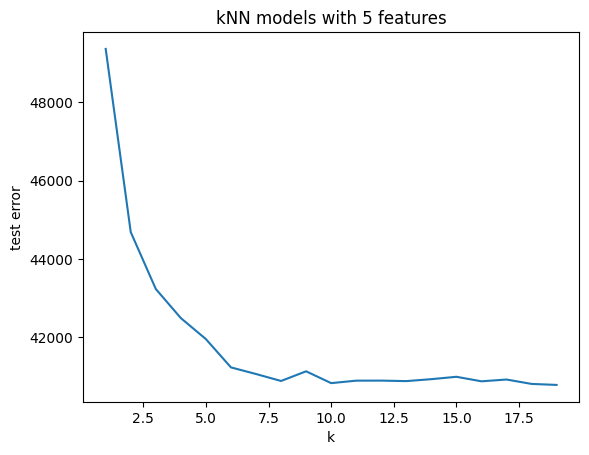

In [82]:
(-df_cv_results_["mean_test_score"]).plot.line(xlabel = "k", ylabel = "test error", title = "kNN models with 5 features")

3\. $k$-nearest neighbors relies on distance and we know there are different distance metrics. Repeat the previous part and use grid search to iterate over both (1) `n_neighbors` and (2) `metric`, which can be `"euclidean"` or `"manhattan"`. Compare the results to the previous part. (Hint: recall the note in the pre-class notebook about grid search conventions for refering to steps in the pipeline.)

In [83]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
grid_search = GridSearchCV(pipeline,
                           param_grid={
                               "kneighborsregressor__n_neighbors": range(1, 20),
                               "kneighborsregressor__metric": ["euclidean", "manhattan"]
                           },
                           scoring="neg_root_mean_squared_error",
                           cv=10)
grid_search.fit(X_train.fillna(X_train.mean()), y_train)
grid_search.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor',
                 KNeighborsRegressor(metric='manhattan', n_neighbors=8))])

In [84]:
df_cv_results2_ = pd.DataFrame(grid_search.cv_results_)

df_cv_results2_

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsregressor__metric,param_kneighborsregressor__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002412,0.000980,0.001674,0.000267,euclidean,1,"{'kneighborsregressor__metric': 'euclidean', '...",-42260.631043,-42197.673211,-53509.837049,-59387.704948,-50557.940212,-41897.856712,-49363.842600,-60114.273713,-49003.674717,-45367.853254,-49366.128746,6389.936365,38
1,0.002053,0.000186,0.001639,0.000102,euclidean,2,"{'kneighborsregressor__metric': 'euclidean', '...",-39647.331077,-38888.841345,-47920.844154,-50392.363553,-52675.019703,-36355.716649,-42455.800745,-53098.449174,-45349.544760,-40034.989860,-44681.890102,5771.093476,36
2,0.001939,0.000136,0.001643,0.000124,euclidean,3,"{'kneighborsregressor__metric': 'euclidean', '...",-42085.752483,-36757.987386,-49492.501682,-48444.123077,-52066.518346,-35674.602964,-38786.056933,-48060.464870,-44953.753149,-35954.712436,-43227.647333,5863.049009,34
3,0.002030,0.000126,0.001738,0.000158,euclidean,4,"{'kneighborsregressor__metric': 'euclidean', '...",-40906.440267,-36177.694035,-48954.870475,-47694.789165,-53733.153608,-35736.726129,-36507.416601,-45880.870461,-44817.019187,-34429.404409,-42483.838434,6331.900237,33
4,0.002017,0.000159,0.001896,0.000252,euclidean,5,"{'kneighborsregressor__metric': 'euclidean', '...",-42389.154529,-36648.916387,-48244.459642,-44965.006660,-51422.932094,-34604.265288,-36399.497080,-44522.553139,-45403.223391,-34865.801085,-41946.580929,5658.954973,32
5,0.002008,0.000145,0.001852,0.000162,euclidean,6,"{'kneighborsregressor__metric': 'euclidean', '...",-40486.080952,-36669.521835,-49664.992850,-42092.835135,-50478.462884,-34669.591609,-35526.534664,-44178.715534,-44471.936432,-33998.345671,-41223.701757,5708.318571,30
6,0.002062,0.000185,0.002073,0.000206,euclidean,7,"{'kneighborsregressor__metric': 'euclidean', '...",-41867.906176,-37668.760465,-49557.565740,-42033.526636,-48956.274995,-33311.461609,-35211.953353,-44226.057790,-43968.155941,-33740.834843,-41054.249755,5603.136550,27
7,0.002298,0.000199,0.002108,0.000162,euclidean,8,"{'kneighborsregressor__metric': 'euclidean', '...",-41476.525702,-37443.381106,-50215.998025,-41854.076825,-48629.099414,-32521.438114,-35533.224099,-43432.402203,-44136.811455,-33519.056345,-40876.201329,5745.284268,21
8,0.002019,0.000175,0.002089,0.000168,euclidean,9,"{'kneighborsregressor__metric': 'euclidean', '...",-41619.183661,-36356.129737,-50921.340576,-42164.905340,-48453.881861,-32156.975959,-36694.837175,-45041.868936,-44964.553664,-32859.260807,-41123.293772,6100.875265,29
9,0.002121,0.000202,0.002164,0.000213,euclidean,10,"{'kneighborsregressor__metric': 'euclidean', '...",-41824.912036,-36379.071419,-49655.260743,-42115.098611,-47923.216571,-31480.018652,-36686.195535,-45089.101761,-44783.705479,-32274.178033,-40821.075884,6018.449441,18


In [85]:
df_cv_results2_["param_kneighborsregressor__n_neighbors"] = df_cv_results2_["param_kneighborsregressor__n_neighbors"].astype(int)

df_cv_results2_.set_index("param_kneighborsregressor__n_neighbors", inplace = True)

param_kneighborsregressor__metric
euclidean    Axes(0.125,0.11;0.775x0.77)
manhattan    Axes(0.125,0.11;0.775x0.77)
Name: pos_mean_test_score, dtype: object

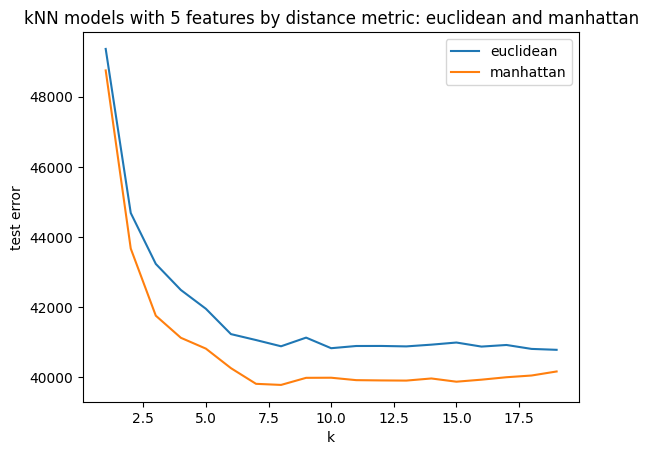

In [86]:
# kNN models with 5 features by distance metric: euclidean and manhattan

df_cv_results2_["pos_mean_test_score"] = -df_cv_results2_["mean_test_score"]

(df_cv_results2_.groupby("param_kneighborsregressor__metric")["pos_mean_test_score"]).plot.line(xlabel = "k", ylabel = "test error", 
                                                                                                title = "kNN models with 5 features by distance metric: euclidean and manhattan",
                                                                                                legend = True)


4\. Combine elements of the previous parts and fit what you think will be the best $k$-nearest neighbors model. Specify which features you are using, the value of $k$, and the distance metric. (There are other elements like scaling that are welcome to investigate too.) Estimate the test error.

In [90]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
# need manhattan distance metric and 8 neighbors

pipeline = make_pipeline(  
    StandardScaler(),
    KNeighborsRegressor(n_neighbors=8,
                        metric="manhattan")
)
# calculate errors from cross-validation
cv_errs = -cross_val_score(pipeline, X=X_train.fillna(X_train.mean()),
                            y=y_train,
                            scoring="neg_root_mean_squared_error", cv=10)
# calculate average of the cross-validation errors
cv_errs.mean()


39772.88073764751

5\. Now fit a linear regression model using the same features that you used in the previous part. Estimate the test error. How does the test error for linear regression compare to the kNN model?


In [91]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
from sklearn.linear_model import LinearRegression

pipeline = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

cv_errs = -cross_val_score(pipeline, X=X_train.fillna(X_train.mean()),
                            y=y_train,
                            scoring="neg_root_mean_squared_error", cv=10)

cv_errs.mean()

45365.84605381213

6\. In Discord, describe your model that resulted in your lowest MSE: features, method (linear or kNN), value of $k$ if applicable, etc. What was the test error?

The model that resulted in the lowest mean square error is KNN model with manhattan distance and k = 8.
